# Plots of oscilloscope records

In [1]:
import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np


## Read waveforms from the file

XINC: 3e-08    YINC: 0.0008    FRAMES: 1016    TRIG: 0.00497    YORIGIN: -91.0
1 , -0.0024 , 0.0296 , 18.58
2 , -0.0024 , 0.0296 , 18.58
3 , -0.0024 , 0.0296 , 18.58
4 , -0.0008 , 0.02 , 13.428
5 , -0.0008 , 0.02 , 13.428
6 , -0.0016 , 0.0608 , 21.268
7 , -0.0016 , 0.0608 , 21.268
8 , -0.0032 , 0.0056 , 1.348
9 , -0.0032 , 0.0056 , 1.348


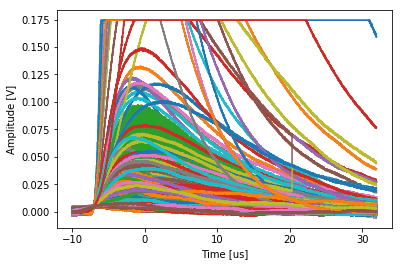

In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np


#with h5py.File('./data/data11.h5','r') as hf:
with h5py.File('./day1/run6/data01.h5','r') as hf:
    #print('List of arrays in this file: \n', hf.keys())
    print 'XINC:', np.array(hf.get('XINC')), '   YINC:', np.array(hf.get('YINC')), '   FRAMES:', np.array(hf.get('FRAMES')), '   TRIG:', np.array(hf.get('TRIG')), '   YORIGIN:', np.array(hf.get('YORIGIN'))
    frames = np.array(hf.get('FRAMES'))
    for n in range(1,frames+1):
        data = hf.get(str(n))
        np_data = 1.0 * np.array(data)
        np_data = np_data - 128 - np.array(hf.get('YORIGIN'))
        np_data = np.array(hf.get('YINC')) * np_data    # to Volts
        np_time = range(0,1400)
        np_time *= np.array(hf.get('XINC'))
        np_time *= 1e6   # to microseconds
        np_time -= 10    # trigger time offset
        
        plt.plot(np_time, np_data) 
        #print np_data
        maximum = 0
        minimum = 255
        suma = 0
        for i in range(1400):
            if np_data[i] > maximum:
                maximum = np_data[i]
            if np_data[i] < minimum:
                minimum = np_data[i]
            suma = suma + np_data[i]
        if n<10:
            print n,',', minimum,',', maximum,',', suma
            
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [V]')


## Parse all data files in current directory
Read in all the data files in current directory and process them into a histogram.

   ./data/data05_1514887055.h5
XINC: 2e-07  YINC: 0.0008  FRAMES: 127  XORIGIN: -0.00014  YORIGIN: -50.0  TRIG: 0.01488
CAPTURING: 1.49
   ./data/data01_1514887024.h5
XINC: 2e-07  YINC: 0.0008  FRAMES: 127  XORIGIN: -0.00014  YORIGIN: -50.0  TRIG: 0.01488
CAPTURING: 1.44
   ./data/data03_1514887040.h5
XINC: 2e-07  YINC: 0.0008  FRAMES: 127  XORIGIN: -0.00014  YORIGIN: -50.0  TRIG: 0.01488
CAPTURING: 1.49
   ./data/data04_1514887047.h5
XINC: 2e-07  YINC: 0.0008  FRAMES: 127  XORIGIN: -0.00014  YORIGIN: -50.0  TRIG: 0.01488
CAPTURING: 1.52
   ./data/data02_1514887032.h5
XINC: 2e-07  YINC: 0.0008  FRAMES: 127  XORIGIN: -0.00014  YORIGIN: -50.0  TRIG: 0.01488
CAPTURING: 1.48
   ./data/data06_1514887063.h5
XINC: 2e-07  YINC: 0.0008  FRAMES: 127  XORIGIN: -0.00014  YORIGIN: -50.0  TRIG: 0.01488
CAPTURING: 1.53


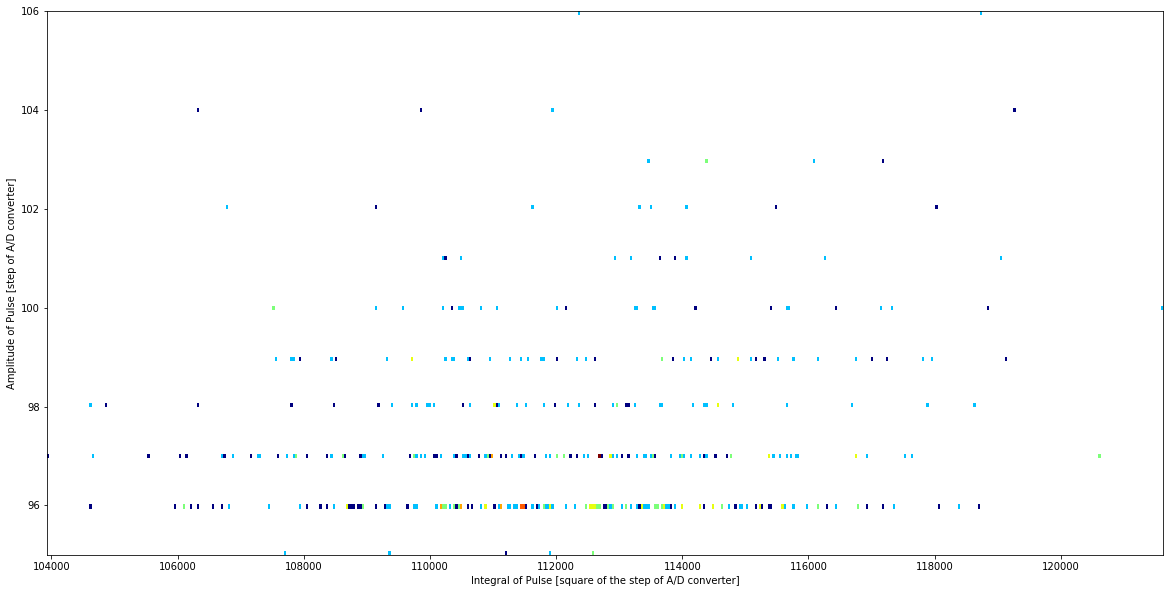

In [3]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if (maximum < 256):
            #if (maximum < 254):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for f in glob.iglob("./data/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass


    
plt.figure(figsize=(20,10))



ble = plt.hist2d(y, x, bins=(500,129), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#cb = plt.colorbar()
#cb.set_label('Count')

#plt.plot([0,10000],[100,100],ls='-',c='r',marker='o')
#plt.plot([0,100000],[100,1000],c='r',lw=3,zorder=99)
#plt.xlim(60000,160000)
#plt.ylim(50,150)
plt.show()


# Simply replot the current x, y in a nicer way

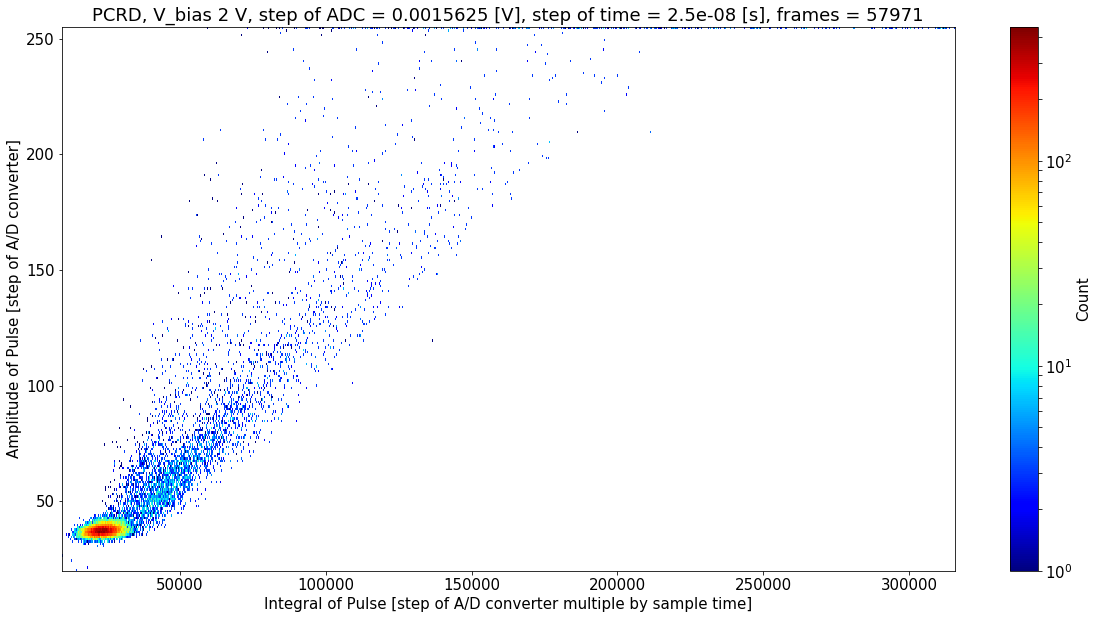

In [29]:
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))

#ble = plt.hist2d(y, x, bins=(1000,250-50),range=np.array([(70000,160000),(50,250)]), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ble = plt.hist2d(y, x, bins=(1000,230), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(100,30),range=np.array([(70000, 80000),(50,80)]), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [step of A/D converter multiple by sample time]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
plt.title('PCRD, V_bias 2 V, step of ADC = ' + str(yinc) + ' [V], step of time = ' + str(xinc) + ' [s], frames = '+ str(all_frames))
cb = plt.colorbar()
cb.set_label('Count')

## Flat histogram (only X or Y)

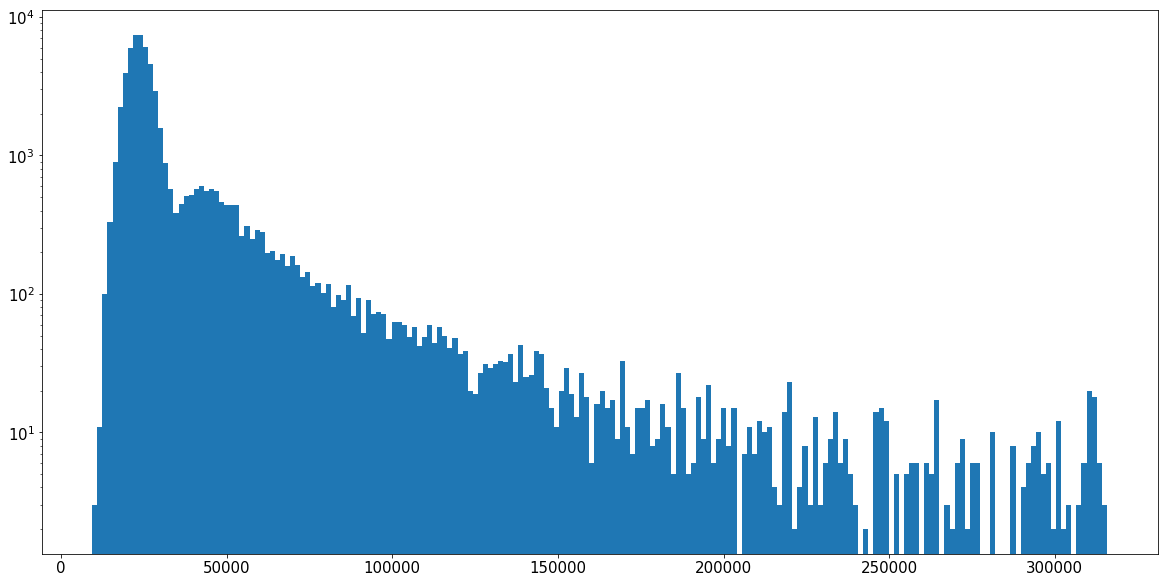

In [31]:
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))

ble = plt.hist(y, bins=200)
plt.yscale('log')
#plt.ylim(0,200)


## Cut Plot

./data/data_airdos/data01.h5 XINC: 9.999999e-08  YINC: 0.000625  FRAMES: 499  YORIGIN: -118.0
./data/data_airdos/data02.h5 XINC: 9.999999e-08  YINC: 0.000625  FRAMES: 499  YORIGIN: -118.0


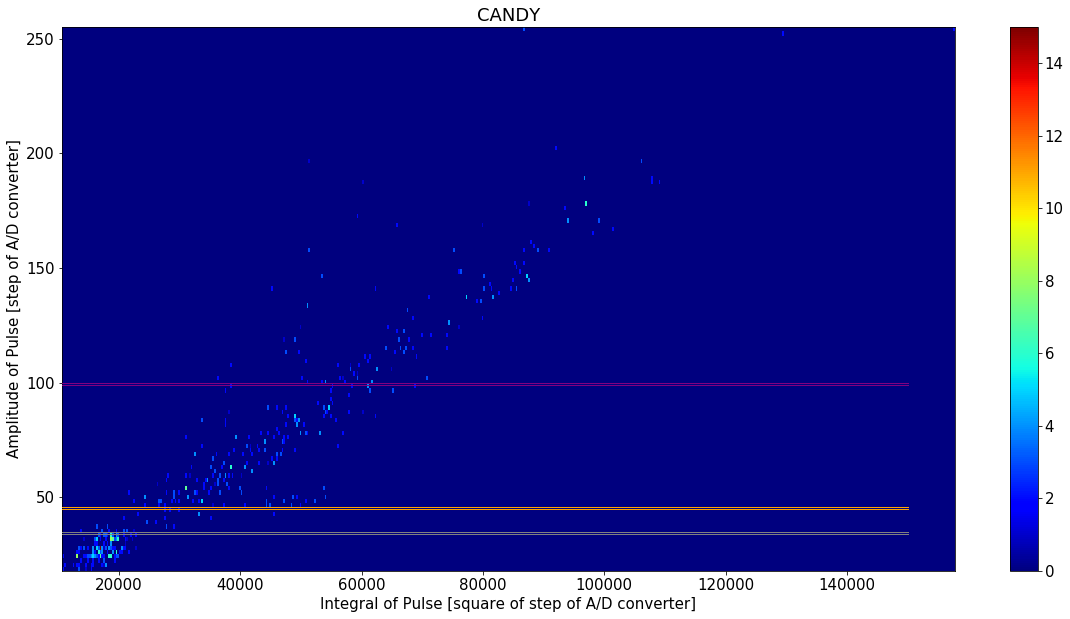

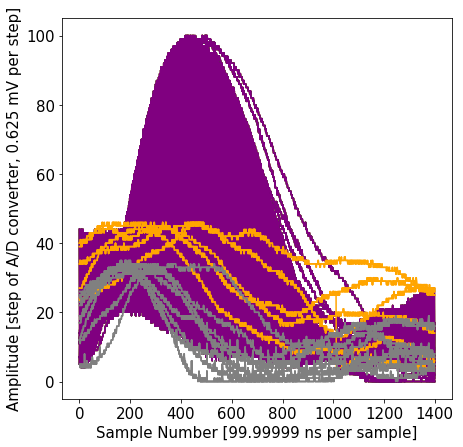

In [66]:
matplotlib.rcParams.update({'font.size': 15})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]

                    if (maximum <= maxmax) and (maximum >= minmin):
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')

#ble = plt.hist2d(y, x, bins=(500,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ble = plt.hist2d(y, x, bins=(500,128),  cmap=plt.cm.jet)
#plt.xlim(60000,125000)
#plt.ylim(50,225)
plt.title('CANDY')
plt.xlabel('Integral of Pulse [square of step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()

maxmax1 = 100
maxmax2 = 100
maxmax3 = 100
maxmax4 = 46
maxmax5 = 35
width = 1

minmin1 = maxmax1-width
plt.plot([0,150000],[maxmax1,maxmax1],c='r',lw=1,zorder=99)
plt.plot([0,150000],[minmin1,minmin1],c='r',lw=1,zorder=99)

minmin2 = maxmax2-width
plt.plot([0,150000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
plt.plot([0,150000],[minmin2,minmin2],c='g',lw=1,zorder=99)

minmin3 = maxmax3-width
plt.plot([0,150000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
plt.plot([0,150000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

minmin4 = maxmax4-width
plt.plot([0,150000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
plt.plot([0,150000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

minmin5 = maxmax5-width
plt.plot([0,150000],[maxmax5,maxmax5],c='grey',lw=1,zorder=99)
plt.plot([0,150000],[minmin5,minmin5],c='grey',lw=1,zorder=99)

plt.figure(2,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
Cut(maxmax1,minmin1,'r')
Cut(maxmax2,minmin2,'g')
Cut(maxmax3,minmin3,'purple')
Cut(maxmax4,minmin4,'orange')
Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.show()

In [17]:
matplotlib.rcParams.update({'font.size': 15})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    suma = 0
                    colour = 'black'
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]
                        suma = suma + np_data[i]
                        
                    if (maximum <= maxmax) and (maximum >= minmin):
                        if (suma>0) and (suma<73000):
                            colour = 'red'
                        if (suma>73000) and (suma<82000):
                            colour = 'green'
                        if (suma>82000) and (suma<100000):
                            colour = 'purple'
                        if (suma>100000) and (suma<150000):
                            colour = 'orange'
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')
plt.xlim(42000,175000)
plt.ylim(35,130)

ble = plt.hist2d(y, x, bins=(500,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.title('CANDY x CERF')
plt.xlabel('Integral of Pulse [square of step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()

maxmax1 = 190
maxmax2 = 167
maxmax3 = 123
maxmax4 = 105
maxmax5 = 60
width = 4

minmin1 = maxmax1-width
#plt.plot([0,175000],[maxmax1,maxmax1],c='r',lw=1,zorder=99)
#plt.plot([0,175000],[minmin1,minmin1],c='r',lw=1,zorder=99)

minmin2 = maxmax2-width
#plt.plot([0,175000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
#plt.plot([0,175000],[minmin2,minmin2],c='g',lw=1,zorder=99)

minmin3 = maxmax3-width
plt.plot([0,175000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
plt.plot([0,175000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

minmin4 = maxmax4-width
#plt.plot([0,175000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
#plt.plot([0,175000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

minmin5 = maxmax5-width
#plt.plot([0,175000],[maxmax5,maxmax5],c='grey',lw=1,zorder=99)
#plt.plot([0,175000],[minmin5,minmin5],c='grey',lw=1,zorder=99)

plt.figure(2,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
#Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
Cut(maxmax3,minmin3,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.show()

ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: values must all be positive

## Vertical Cut

./data/07-p12.7mev-navyseny-tok-3V/data4.h5 XINC: 5e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -79.0
./data/07-p12.7mev-navyseny-tok-3V/data6.h5 XINC: 5e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -79.0
./data/07-p12.7mev-navyseny-tok-3V/data8.h5 XINC: 5e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -79.0
./data/07-p12.7mev-navyseny-tok-3V/data5.h5 XINC: 5e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -79.0
./data/07-p12.7mev-navyseny-tok-3V/data2.h5 XINC: 5e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -79.0
./data/07-p12.7mev-navyseny-tok-3V/data1.h5 XINC: 5e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -79.0
./data/07-p12.7mev-navyseny-tok-3V/data7.h5 XINC: 5e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -79.0
./data/07-p12.7mev-navyseny-tok-3V/data3.h5 XINC: 5e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -79.0
87522.0
79790.0 .
76197.0 .
87718.0
75524.0 .
78699.0 .
78699.0 .
76280.0 .
86445.0
77351.0 .


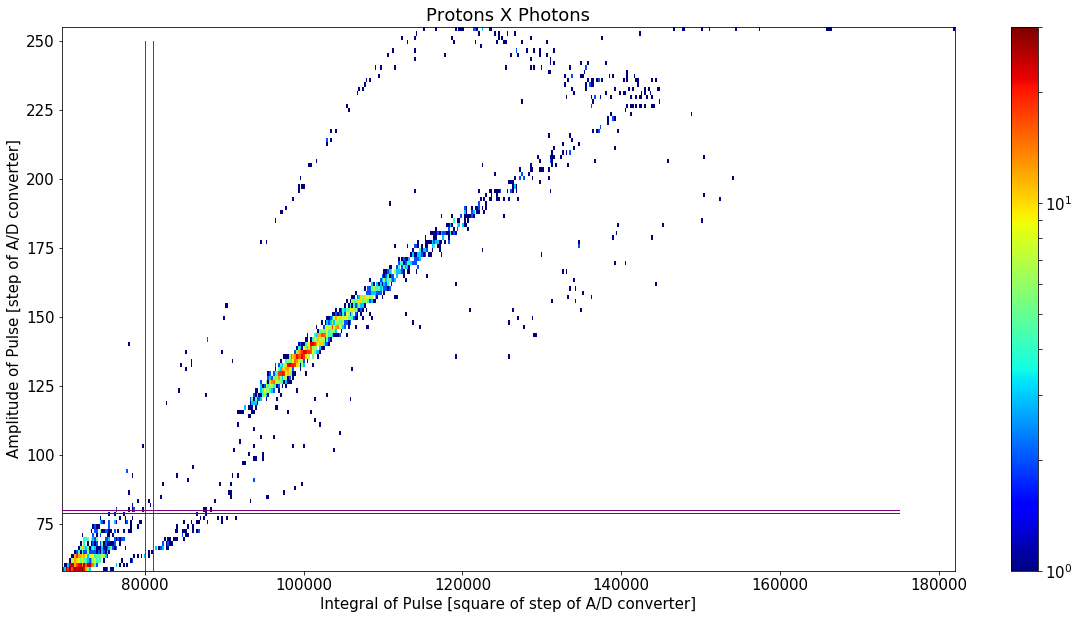

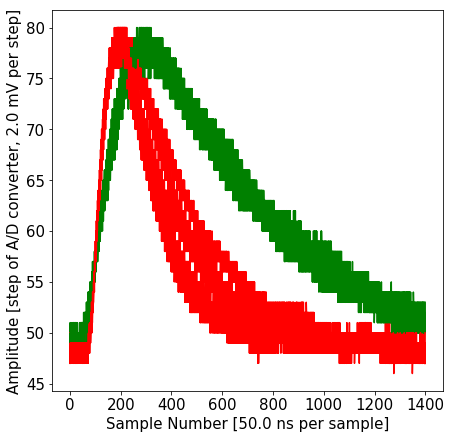

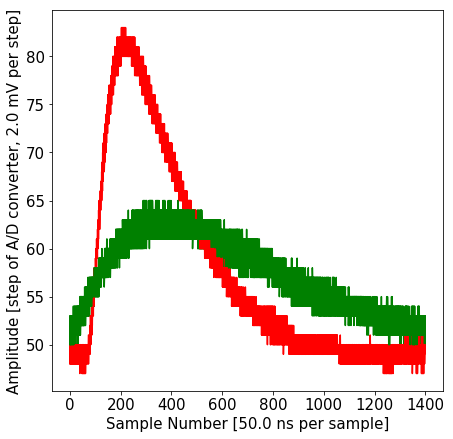

In [24]:
matplotlib.rcParams.update({'font.size': 15})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    suma = 0
                    colour = 'black'
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]
                        suma = suma + np_data[i]
                        
                    if (maximum <= maxmax) and (maximum >= minmin):
                        if (suma>0) and (suma<73000):
                            colour = 'purple'
                        if (suma>73000) and (suma<82000):
                            print suma, "."
                            colour = 'red'
                        if (suma>82000) and (suma<100000):
                            print suma
                            colour = 'green'
                        if (suma>100000) and (suma<150000):
                            colour = 'orange'
                        plt.plot(np_data, c=colour)
        except:        
            pass

def VCut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    suma = 0
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]
                        suma = suma + np_data[i]
                        
                    if (suma<=maxmax) and (suma>=minmin):
                        #print maximum
                        colour = 'green'
                        if (maximum>70):
                            colour = 'red'
                            
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')
plt.xlim(42000,175000)
plt.ylim(35,130)

ble = plt.hist2d(y, x, bins=(500,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.title('Protons X Photons')
plt.xlabel('Integral of Pulse [square of step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()

maxmax1 = 81000
maxmax2 = 167
maxmax3 = 80
maxmax4 = 105
maxmax5 = 60
width = 1

minmin1 = maxmax1-1000
plt.plot([maxmax1,maxmax1],[0,250],c='r',lw=1,zorder=99)
plt.plot([minmin1,minmin1],[0,250],c='r',lw=1,zorder=99)

minmin2 = maxmax2-width
#plt.plot([0,175000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
#plt.plot([0,175000],[minmin2,minmin2],c='g',lw=1,zorder=99)

minmin3 = maxmax3-width
plt.plot([0,175000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
plt.plot([0,175000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

minmin4 = maxmax4-width
#plt.plot([0,175000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
#plt.plot([0,175000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

minmin5 = maxmax5-width
#plt.plot([0,175000],[maxmax5,maxmax5],c='grey',lw=1,zorder=99)
#plt.plot([0,175000],[minmin5,minmin5],c='grey',lw=1,zorder=99)

plt.figure(2,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
#Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
Cut(maxmax3,minmin3,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.figure(3,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
#Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
VCut(maxmax1,minmin1,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.show()

## Limited maximum histogram

./data/data11.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data10.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data14.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data04.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data15.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data05.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data16.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data07.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data03.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data01.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data02.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data06.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data12.h5 XINC: 3e-08  YINC: 0.0004  FRAMES: 1016  YORIGIN: -90.0
./data/data08.h5 XINC: 3e-08  YINC: 0.0004  FRAMES:

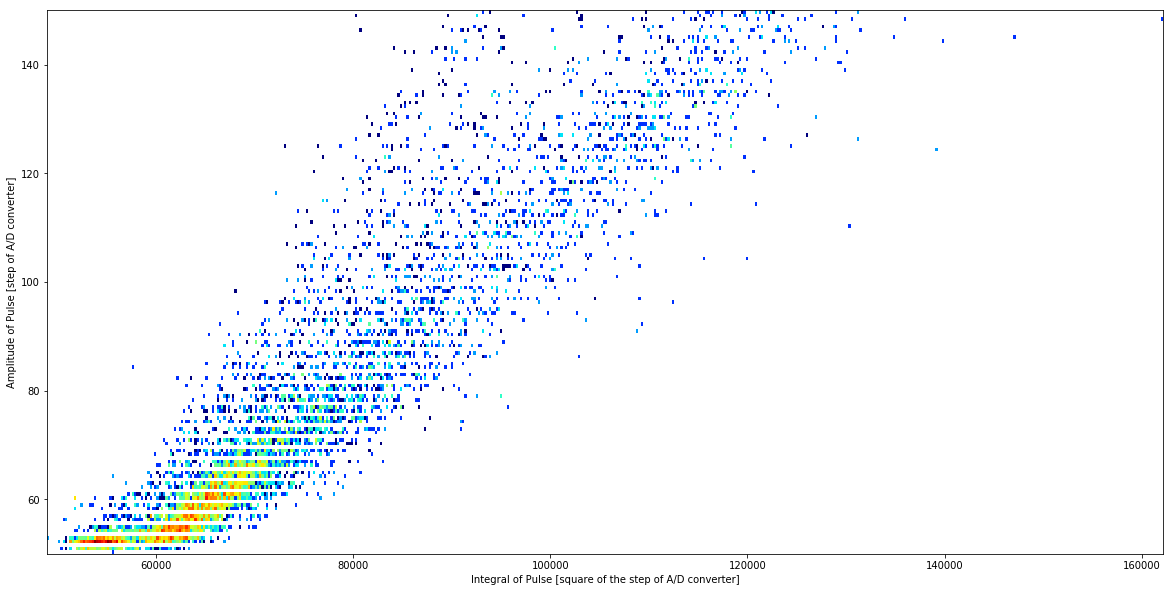

In [6]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if (maximum < 151):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for f in glob.iglob("./data/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass


    
plt.figure(figsize=(20,10))



ble = plt.hist2d(y, x, bins=(500,150), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#cb = plt.colorbar()
#cb.set_label('Count')

#plt.plot([0,10000],[100,100],ls='-',c='r',marker='o')
#plt.plot([0,100000],[100,1000],c='r',lw=3,zorder=99)
#plt.xlim(60000,160000)
#plt.ylim(50,150)
plt.show()


## Histogram for oscilloscope B

   ./dataB/data05_1511969007.h5
XINC: 2.5e-08  YINC: 0.0002  FRAMES: 117  XORIGIN: -2.499999e-06  YORIGIN: -84.0  TRIG: 0.00444
CAPTURING: 87.74
   ./dataB/data07_1511969335.h5
XINC: 2.5e-08  YINC: 0.0002  FRAMES: 185  XORIGIN: -2.499999e-06  YORIGIN: -84.0  TRIG: 0.00444
CAPTURING: 181.1
   ./dataB/data08_1511969580.h5
XINC: 2.5e-08  YINC: 0.0002  FRAMES: 294  XORIGIN: -2.499999e-06  YORIGIN: -84.0  TRIG: 0.00444
CAPTURING: 237.4
   ./dataB/data06_1511969147.h5
XINC: 2.5e-08  YINC: 0.0002  FRAMES: 177  XORIGIN: -2.499999e-06  YORIGIN: -84.0  TRIG: 0.00444
CAPTURING: 135.11
   ./dataB/data01_1511968204.h5
XINC: 2.5e-08  YINC: 0.0002  FRAMES: 1016  XORIGIN: -2.499999e-06  YORIGIN: -84.0  TRIG: 0.00444
CAPTURING: 322.27
   ./dataB/data04_1511968912.h5
XINC: 2.5e-08  YINC: 0.0002  FRAMES: 173  XORIGIN: -2.499999e-06  YORIGIN: -84.0  TRIG: 0.00444
CAPTURING: 130.26
   ./dataB/data03_1511968773.h5
XINC: 2.5e-08  YINC: 0.0002  FRAMES: 226  XORIGIN: -2.499999e-06  YORIGIN: -84.0  TRIG: 0.0044

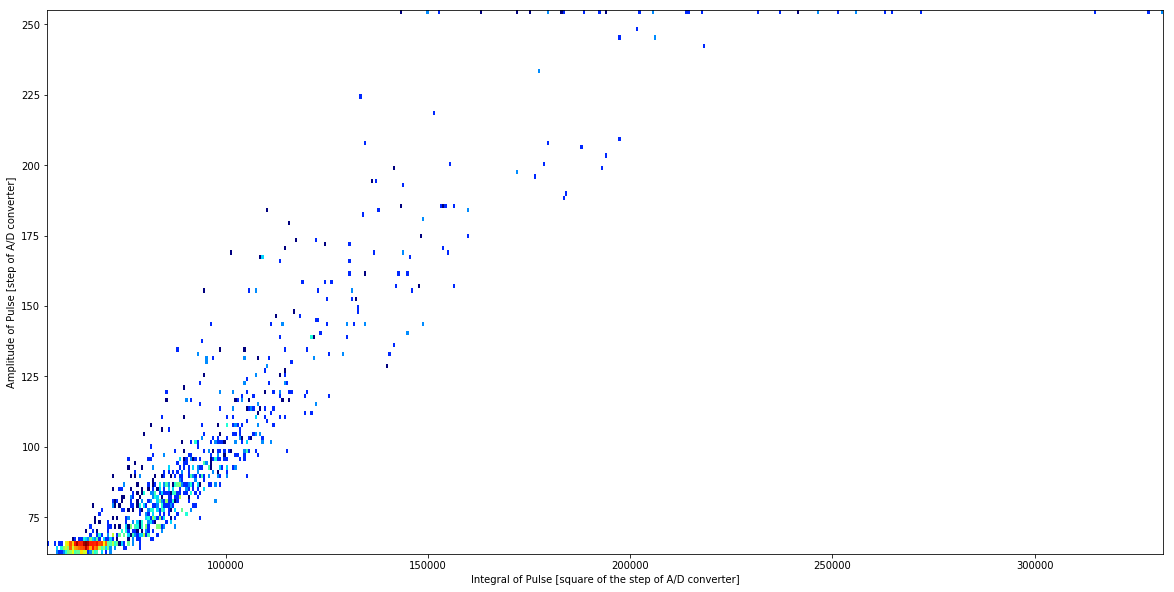

In [27]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if (maximum < 256):
            #if (maximum < 254):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for f in glob.iglob("./dataB/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

for f in glob.iglob("./dataB/**/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass


    
plt.figure(figsize=(20,10))



ble = plt.hist2d(y, x, bins=(500,129), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#cb = plt.colorbar()
#cb.set_label('Count')

#plt.plot([0,10000],[100,100],ls='-',c='r',marker='o')
#plt.plot([0,100000],[100,1000],c='r',lw=3,zorder=99)
#plt.xlim(60000,160000)
#plt.ylim(50,150)
plt.show()
